In [93]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import pandas as pd
import matplotlib.colors as mcolors
from itertools import cycle
import plotly.graph_objects as go
from IPython.display import display
import copy
import matplotlib as mpl
from plotly.subplots import make_subplots
from matplotlib.colors import ListedColormap, BoundaryNorm
import distinctipy


Load embedding file: 

In [94]:
# load embedding 
embedding_file_path = "/group/maikesgrp/makayla/run_in_separate_nodes/embeddings_folder/spectral/clustering/embeddings_w_residual/01th_ensemble_min_dist_0.0_n_neighbors_500.npy"  

## Embedding Example

Text(0.5, 0.98, 'Embedding Example')

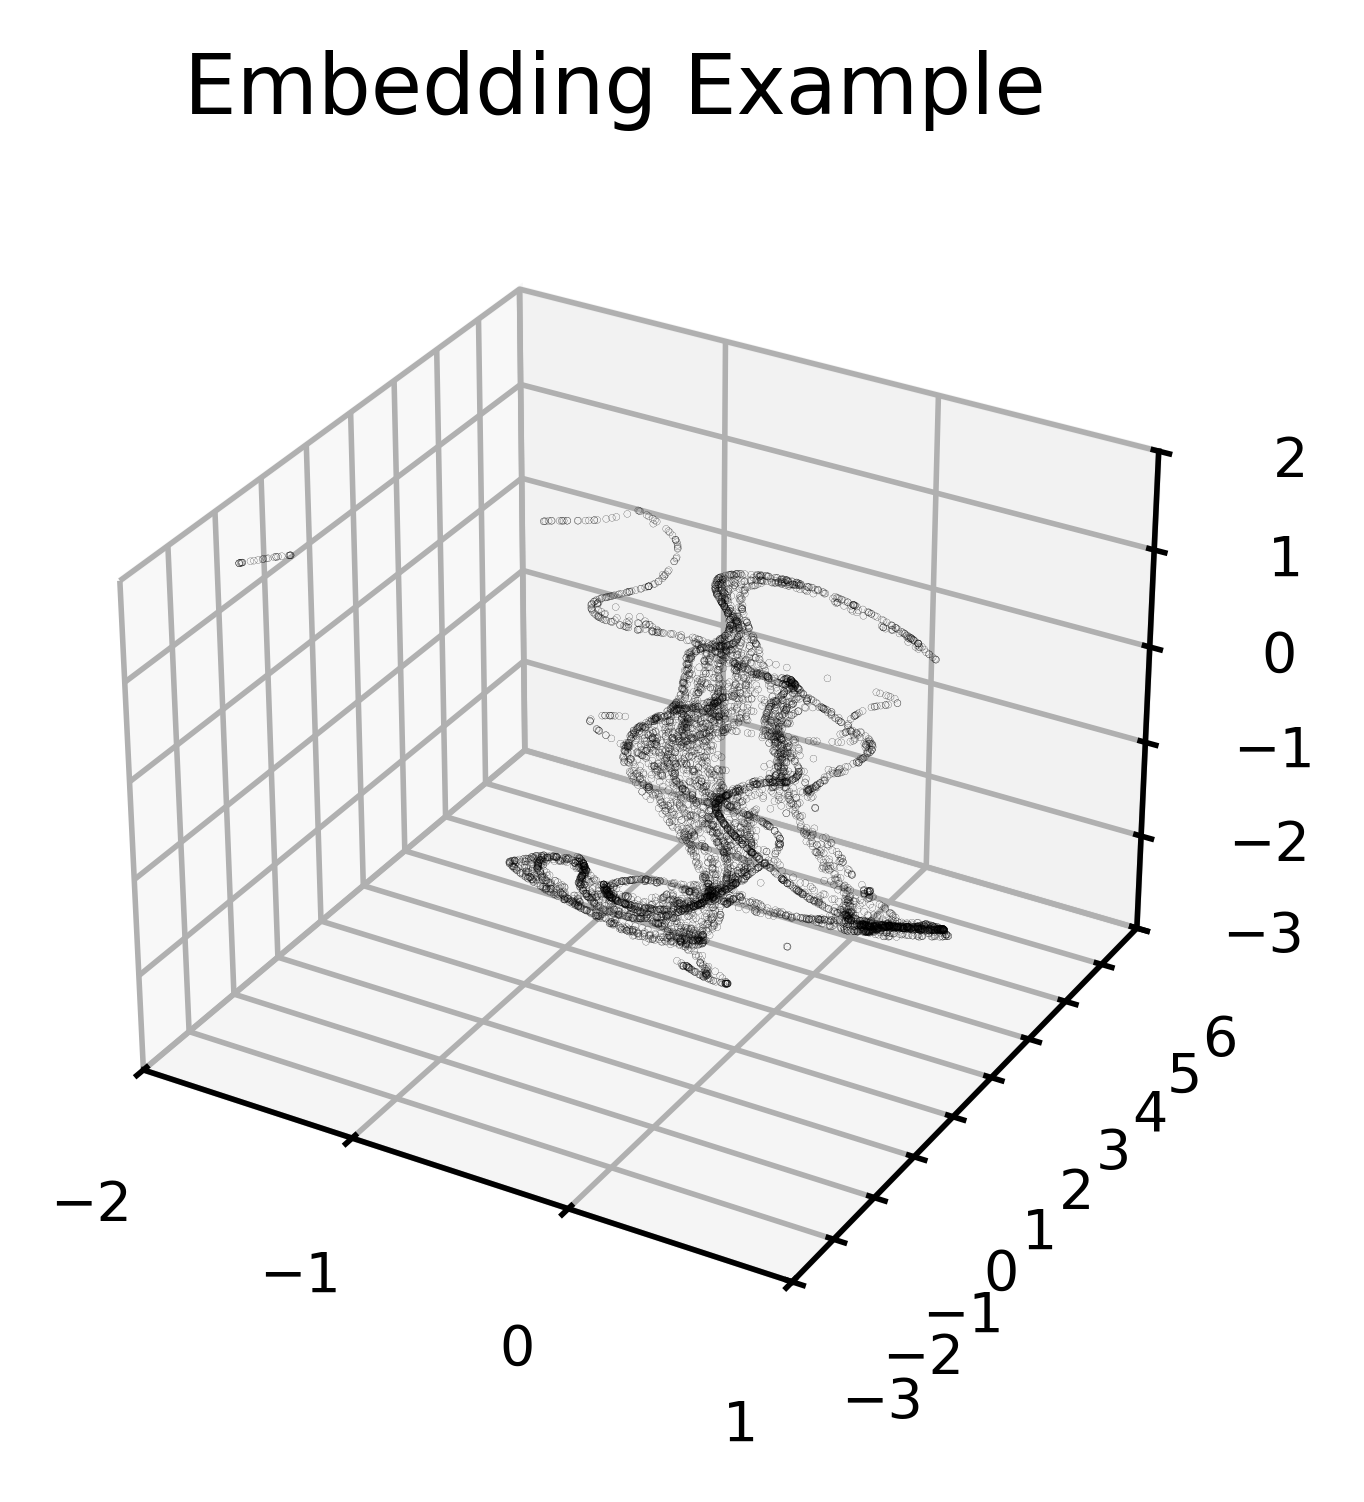

In [95]:
fig = plt.figure(figsize=(3,3),dpi=500)
ax = fig.add_subplot(111, projection='3d')
s = .001
subsample=50
alpha =1
scaler = StandardScaler()
emb_data = np.load(embedding_file_path, allow_pickle=True)
emb_data = scaler.fit_transform(emb_data)
xy = emb_data[::subsample]

im = ax.scatter(xy[:,0],xy[:,1],xy[:,2], s=s, alpha=alpha, marker='o', color="black")
ax.axes.set_xlim3d(left=-2, right=1) 
ax.axes.set_ylim3d(bottom=-3, top=6)
ax.axes.set_zlim3d(bottom=-3, top=2)

ax.set_xticks([-2,-1,0,1])
ax.set_yticks([-3,-2,-1,0, 1, 2,3,4,5,6])
ax.set_zticks([-3,-2, -1, 0,1,2])
ax.tick_params(labelsize=8)

plt.suptitle('Embedding Example')

## Embedding Example: 3D Interactive Scatter Plot

In [96]:
fig = px.scatter_3d(x=xy[:,0], y=xy[:,1], z=xy[:,2],color_discrete_sequence=['black'])
fig.update_traces(marker=dict(size=.5))
fig.update_layout(
    width=1000,  
    height=1000, 
    title="Embedding Example: 3D Interactive Scatter Plot"
)
fig.show()

## Load clusters and corresponding entropy: 

# Here, choose number of clusters! (10, 15, 20) 

In [97]:
nc = 20

In [98]:
# load clusters 
cluster_file_path = '/group/maikesgrp/makayla/run_in_separate_nodes/embeddings_folder/spectral/spectral_clustering_codes/_new_attempt/clusters_nclust'+str(nc)+'/01th_ensemble_nclust_'+str(nc)+'_min_dist_0.0_umap_neighbors_500_hclust_neighbors_500.npy'
lab_data = np.load(cluster_file_path, allow_pickle=True) #cluster label data 

entropy_file_path = '/group/maikesgrp/makayla/run_in_separate_nodes/embeddings_folder/spectral/spectral_clustering_codes/_new_attempt/entropy_nclust'+str(nc)+'/500_0.0_nclust'+str(nc)+'.npy'
ent_data_not_normalized = np.load(entropy_file_path, allow_pickle=True) # entropy data 
ent_data_normalized = (ent_data_not_normalized/(-np.log2(1/nc)))*100


## Plot clusters and corresponding entropy 

Text(0.5, 0.95, '20 Clusters and Corresponding Entropy')

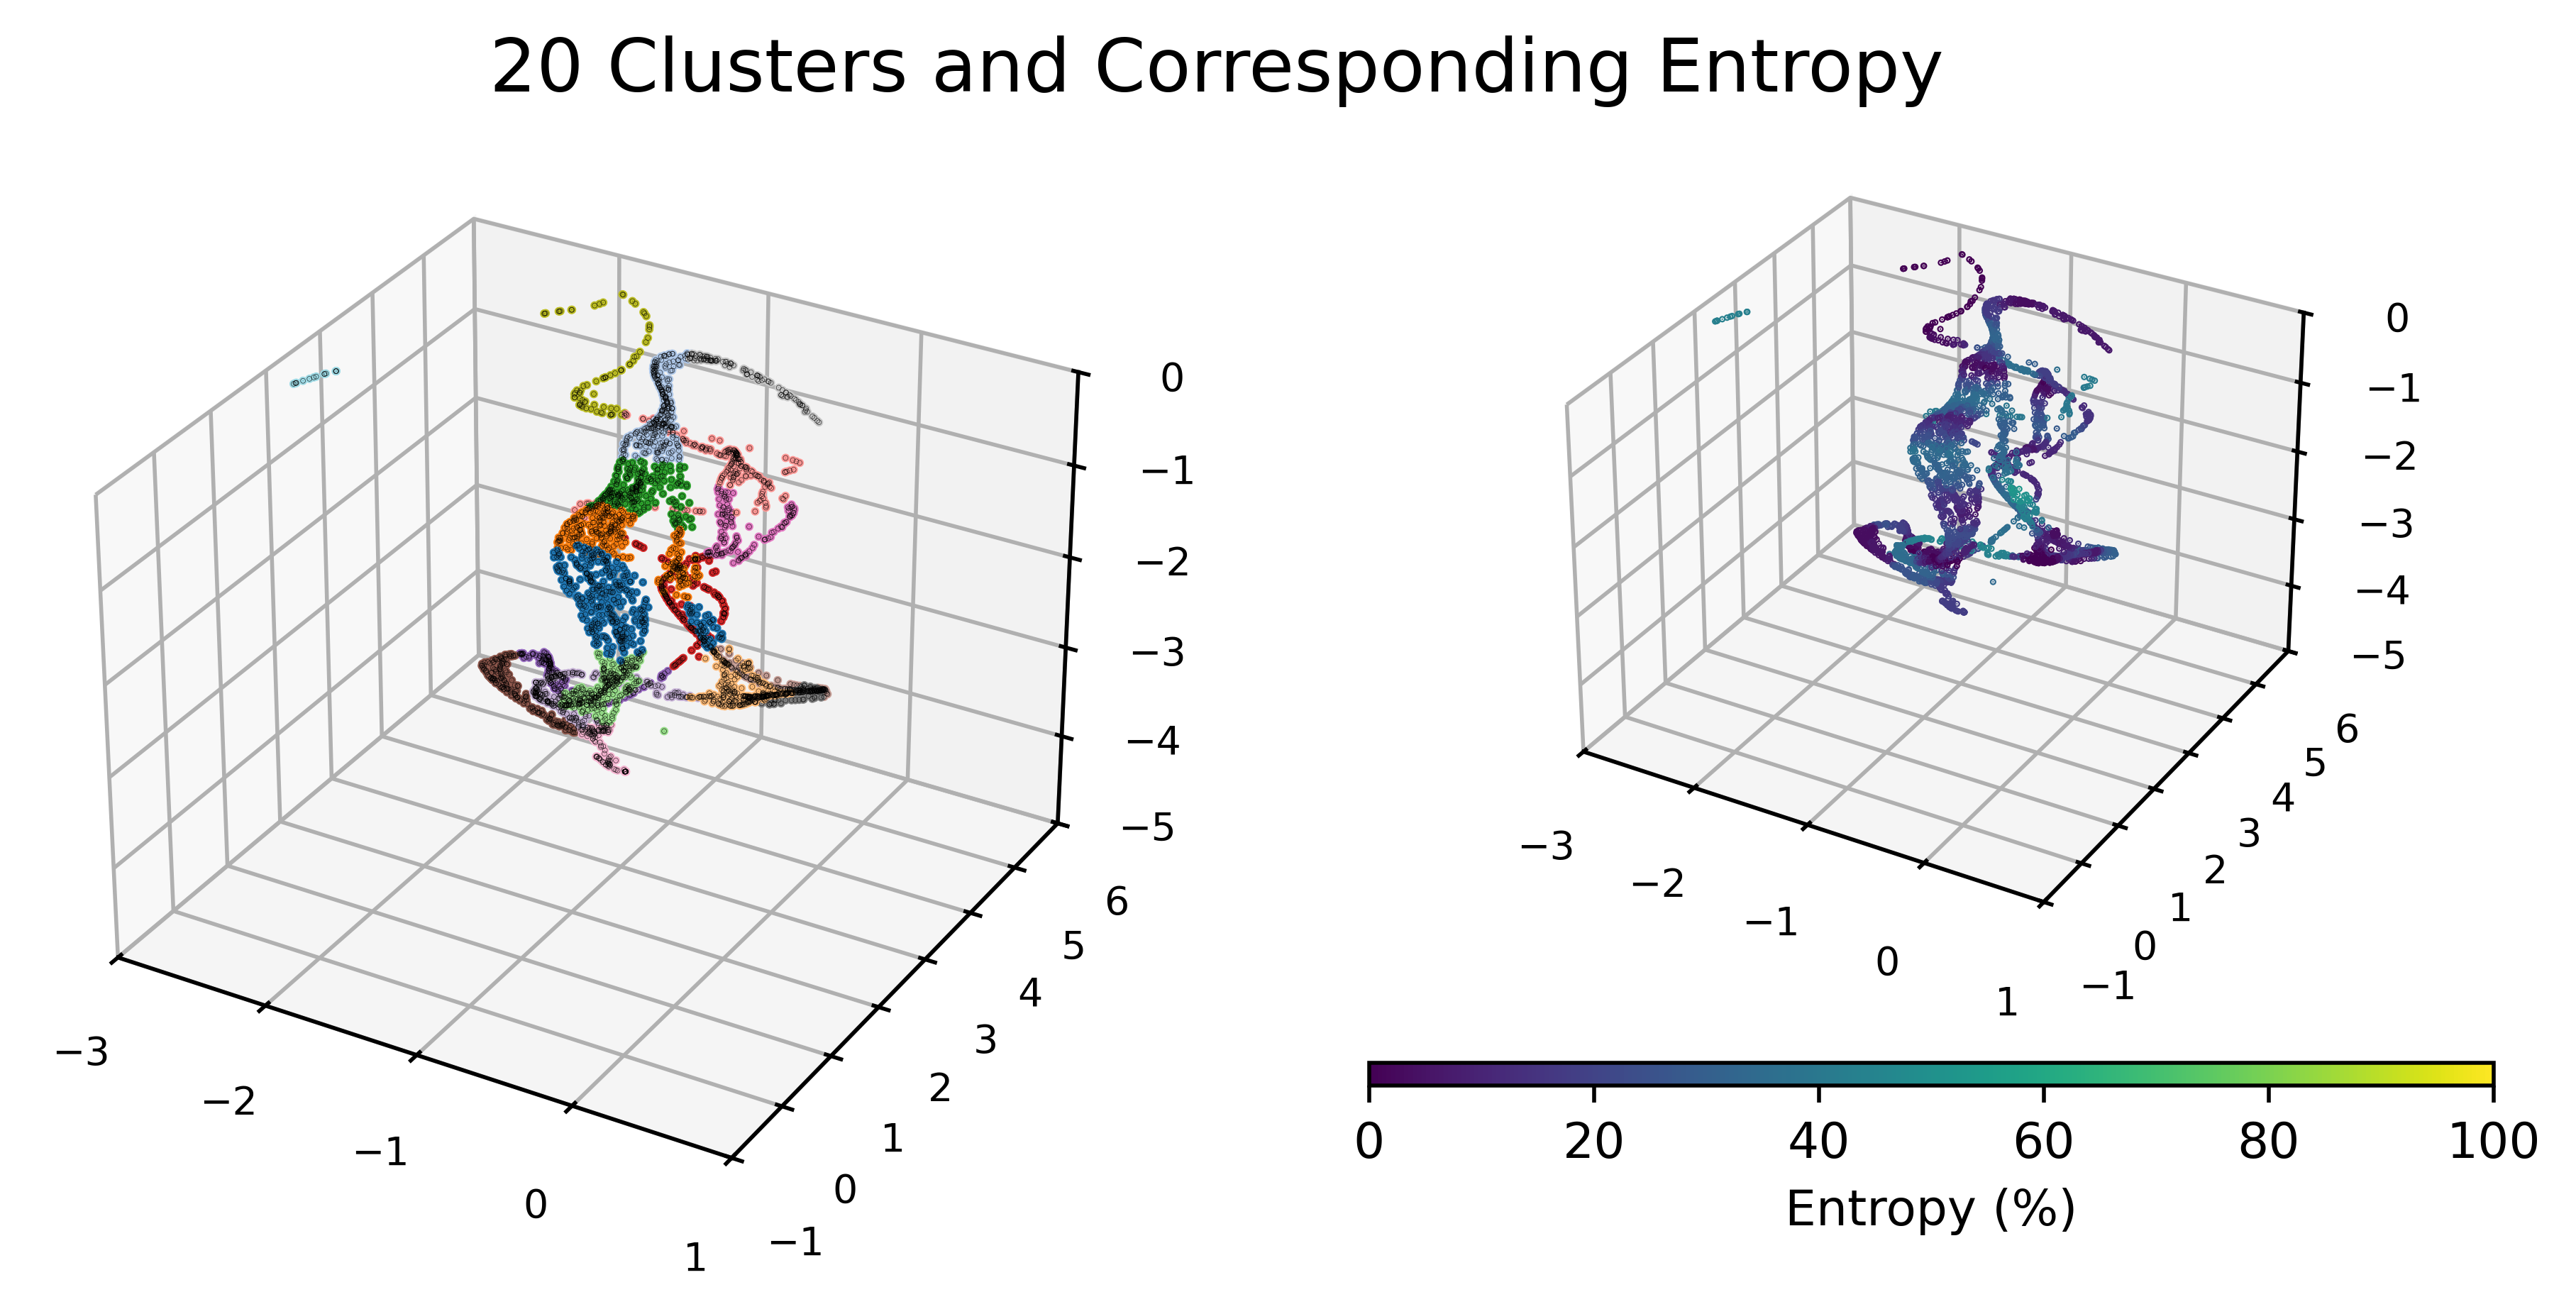

In [99]:
fig = plt.figure(figsize=(9,4),dpi=500)
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')

"""
Figure 1 
"""
s=.5; subsample=100; alpha=1
emb_data = np.load(embedding_file_path, allow_pickle=True) # embedding 
lab_data = np.load(cluster_file_path, allow_pickle=True) #cluster label 
lab_data = lab_data[::subsample]
scaler = StandardScaler()
emb_data = scaler.fit_transform(emb_data)
    
data = emb_data
values = lab_data
unique_labels = np.sort(np.unique(values))

colors = [plt.cm.tab20(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = (values == k)
    xy = emb_data[::subsample]
    new_xy = xy[class_member_mask,:] 
    im = ax1.scatter(*new_xy.T, c=np.array(col).reshape((1,-1)), label =col, s=s, alpha=alpha, zorder=4)

im = ax1.scatter(xy[:,0],xy[:,1],xy[:,2], color='black', s=.01, alpha=.75)  

ax1.axes.set_xlim3d(left=-3, right=1) 
ax1.axes.set_ylim3d(bottom=-1, top=6) 
ax1.axes.set_zlim3d(bottom=-5, top=0) 


"""
Figure 2
"""
s=.1; subsample=100; alpha=1

emb_data = np.load(embedding_file_path, allow_pickle=True)
ent_data = ent_data_normalized
ent_data = ent_data[::subsample]
scaler = StandardScaler()
emb_data = scaler.fit_transform(emb_data)
xy = emb_data[::subsample]
mynorm = mcolors.Normalize(vmin=0, vmax=100)
im = ax2.scatter(xy[:,0],xy[:,1],xy[:,2], c=ent_data, s=s, alpha=1,norm=mynorm)

ax2.axes.set_xlim3d(left=-3, right=1) 
ax2.axes.set_ylim3d(bottom=-1, top=6)
ax2.axes.set_zlim3d(bottom=-5, top=0)

cbar = plt.colorbar(im, ax=ax2, norm=mynorm, orientation='horizontal',pad=0.1,aspect=50)
cbar.set_label('Entropy (%)')

for ax in [ax1,ax2]:

    ax.set_xticks([-3,-2, -1, 0,1])
    ax.set_yticks([-1,0,1,2,3, 4, 5, 6])
    ax.set_zticks([-5,-4,-3,-2, -1, 0])
    ax.tick_params(labelsize=8)

ax1.set_title
ax2.set_title
plt.suptitle(str(nc)+' Clusters and Corresponding Entropy',y=0.95,size=15)


## 3D Interactive Cluster Plot

In [100]:

subsample = 100 
emb_data = np.load(embedding_file_path, allow_pickle=True)  # embedding 
lab_data = np.load(cluster_file_path, allow_pickle=True)    # cluster label 


lab_data_ss = lab_data[::subsample]
scaler = StandardScaler()
emb_data_scaled = scaler.fit_transform(emb_data)
emb_data_ss = emb_data_scaled[::subsample]
values = lab_data_ss
unique_values = np.sort(np.unique(values))
nc = len(unique_values)  # number of clusters


df = pd.DataFrame(emb_data_ss, columns=['x', 'y', 'z'])
df['label'] = pd.Categorical(values, categories=unique_values, ordered=True)


colors = [mcolors.to_hex(plt.cm.tab20(i)) for i in np.linspace(0, 1, nc)]
color_map = {label: color for label, color in zip(unique_values, colors)}


fig = px.scatter_3d(
    df, x='x', y='y', z='z', color='label', 
    title=f"{nc} Clusters: Interactive 3D Scatter Plot",
    color_discrete_map=color_map,
    category_orders={"label": list(unique_values[::-1])}  
)

fig.update_layout(
    width=1000,
    height=1000,
    legend=dict(
        title="Clusters",
        font=dict(size=14),
        orientation="v",    
        yanchor="top",
        y=1,                 
        xanchor="left",
        x=1.02,              
        itemsizing='constant',  
        traceorder="normal"
    ),
    margin=dict(r=120)         
)

fig.update_traces(marker=dict(size=1.5))
fig.show()

## Side by side interactive cluster and entropy plots: 

In [101]:

subsample = 100

# load data 
emb_data = np.load(embedding_file_path, allow_pickle=True)
lab_data = np.load(cluster_file_path, allow_pickle=True)
ent_data = np.load(entropy_file_path, allow_pickle=True)
ent_data_norm = ent_data / (-np.log2(1/nc)) * 100 # normalize entropy data 

# subsample
emb_data_ss = emb_data[::subsample]
lab_data_ss = lab_data[::subsample]
ent_data_ss = ent_data_norm[::subsample]

# scale 
scaler = StandardScaler()
emb_data_scaled = scaler.fit_transform(emb_data_ss)


df = pd.DataFrame(emb_data_scaled, columns=['x', 'y', 'z'])
df['label'] = pd.Categorical(lab_data_ss)

colors = [mcolors.to_hex(plt.cm.tab20(i)) for i in np.linspace(0, 1, len(unique_labels))]
color_map = {label: color for label, color in zip(unique_labels, colors)}


cluster_traces = []
for label in df['label'].cat.categories:
    mask = df['label'] == label
    cluster_traces.append(go.Scatter3d(
        x=df.loc[mask, 'x'], y=df.loc[mask, 'y'], z=df.loc[mask, 'z'],
        mode='markers',
        marker=dict(color=color_map[label], size=2),
        name=str(label),
        legendgroup=str(label),
        showlegend=False
    ))


entropy_trace = go.Scatter3d(
    x=df['x'], y=df['y'], z=df['z'],
    mode='markers',
    marker=dict(
        size=2,
        color=ent_data_ss,
        colorscale='Viridis',
        #colorbar=dict(title='Entropy (%)'),
        colorbar=dict(
    title='Entropy (%)',
    ticks='',
    showticklabels=False  # disables all tick labels
),
        cmin=0, cmax=100,
        opacity=0.8
    ),
    name=' '
)

# two subplots side by side
fig = go.FigureWidget(make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=(str(nc)+" Clusters", "Entropy (%)")
))


for tr in cluster_traces:
    fig.add_trace(tr, row=1, col=1)

fig.add_trace(entropy_trace, row=1, col=2)


axis_range = dict(range=[-3, 3], autorange=False, zeroline=False)
fig.update_layout(
    scene=dict(xaxis=axis_range, yaxis=axis_range, zaxis=axis_range),
    scene2=dict(xaxis=axis_range, yaxis=axis_range, zaxis=axis_range),
    width=1200,
    height=700,
    legend=dict(font=dict(size=12)),
    margin=dict(l=0, r=0, b=0, t=40),
)

def sync_cameras(trace, points, state):
    camera = fig.layout.scene.camera
    fig.layout.scene2.camera = camera

fig.layout.on_change(lambda layout, _: sync_cameras(None, None, None), 'scene.camera')

display(fig)

FigureWidget({
    'data': [{'legendgroup': '0.0',
              'marker': {'color': '#1f77b4', 'size': 2},
              'mode': 'markers',
              'name': '0.0',
              'scene': 'scene',
              'showlegend': False,
              'type': 'scatter3d',
              'uid': '7aa31ce5-5fee-4a50-bebb-3b3f0bee4d8f',
              'x': array([0.7455405 , 0.7200199 , 0.70004785, ..., 0.7336179 , 0.63444847,
                          0.7348318 ], dtype=float32),
              'y': array([-0.494499  , -0.5124789 , -0.5256443 , ..., -0.45918214, -0.58387965,
                          -0.501642  ], dtype=float32),
              'z': array([0.05185654, 0.14445342, 0.22122042, ..., 0.0689957 , 0.3471622 ,
                          0.05705583], dtype=float32)},
             {'legendgroup': '1.0',
              'marker': {'color': '#aec7e8', 'size': 2},
              'mode': 'markers',
              'name': '1.0',
              'scene': 'scene',
              'showlegend': False,


## Spatial Clusters

Put summer and winter clusters into the correct shape for plotting: 

In [102]:
# get data shape and location of NAN values 
output_data = np.load("output_data.npy")
indmiss = np.load("indmiss.npy")
cls = np.nan * np.ones(output_data.shape[0]*output_data.shape[1]) 

# cluster data: 
lab_data = np.load(cluster_file_path, allow_pickle=True)
cluster_1 = lab_data

#split cluster data for summer and winter
def split_array_in_half(arr):
    """Splits an array into two halves."""
    mid = len(arr) // 2
    return arr[:mid], arr[mid:]

my_array = cluster_1
first_half, second_half = split_array_in_half(my_array)

import copy
cls1 = cls 

cls2= cls 
cls_copy = copy.copy(cls)

cls1[indmiss] = first_half 
cls_copy[indmiss] = second_half


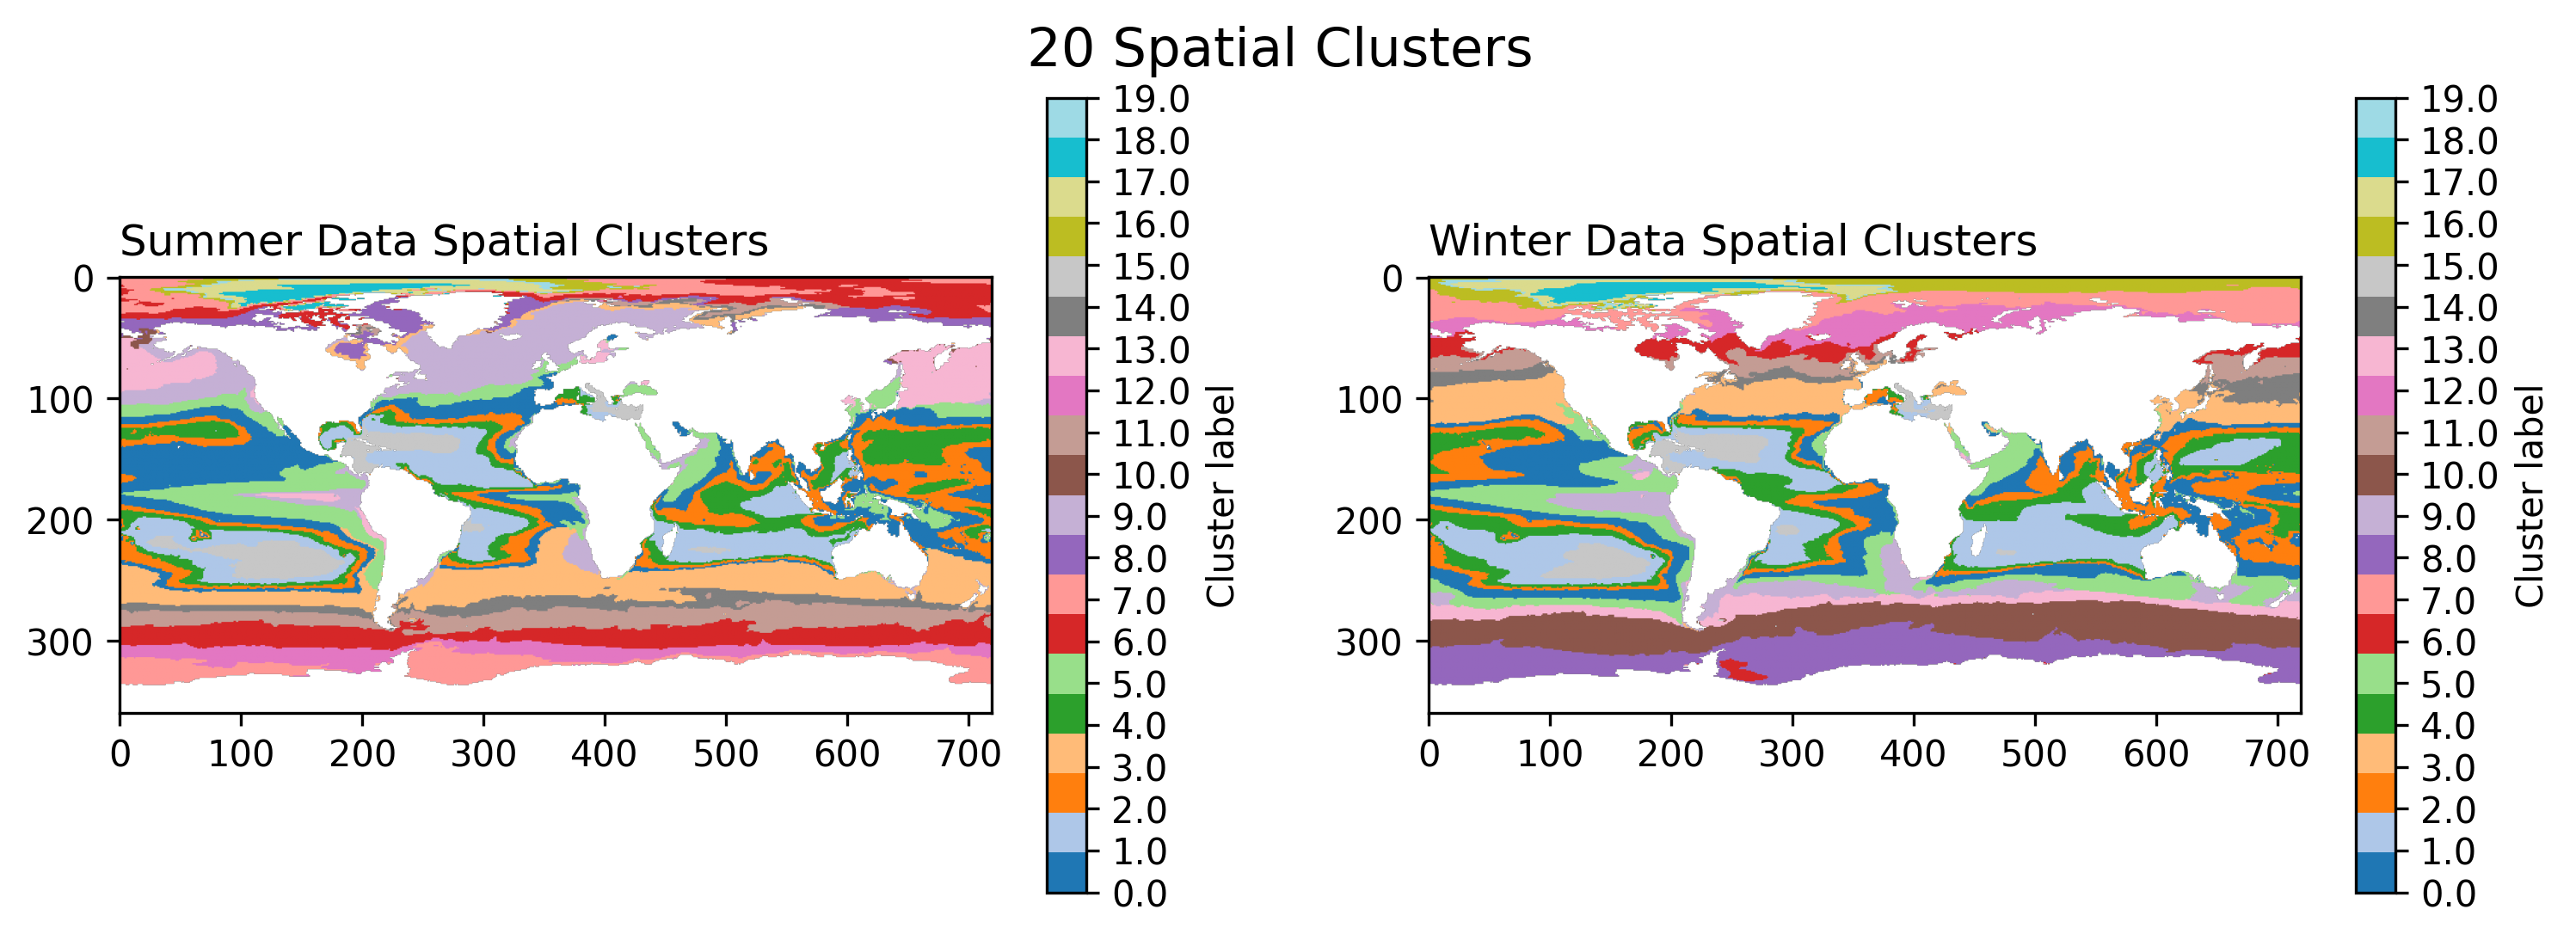

In [103]:
fig = plt.figure(figsize=(12,4), dpi=300)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

colors = [plt.cm.tab20(each) for each in np.linspace(0, 1, len(unique_labels))]
color_map = ListedColormap(colors)


im1 = ax1.imshow(np.reshape(cls1, output_data.shape[0:2])[::-1,:], cmap=color_map)
im2 = ax2.imshow(np.reshape(cls_copy, output_data.shape[0:2])[::-1,:], cmap=color_map)

ax1.set_title('Summer Data Spatial Clusters', loc='left')
ax2.set_title('Winter Data Spatial Clusters', loc='left')


cbar1 = fig.colorbar(im1, ax=ax1)
cbar2 = fig.colorbar(im2, ax=ax2)


ticks = np.arange(len(unique_labels))
cbar1.set_ticks(ticks)
cbar1.set_ticklabels(unique_labels)
cbar1.set_label('Cluster label')

cbar2.set_ticks(ticks)
cbar2.set_ticklabels(unique_labels)
cbar2.set_label('Cluster label')

fig.suptitle(f"{nc} Spatial Clusters", y=0.95, size=15)
plt.show()

## Spatial Entropy Percentage

Text(0.5, 0.95, 'Entropy Spatial Plots for number of clusters = 20')

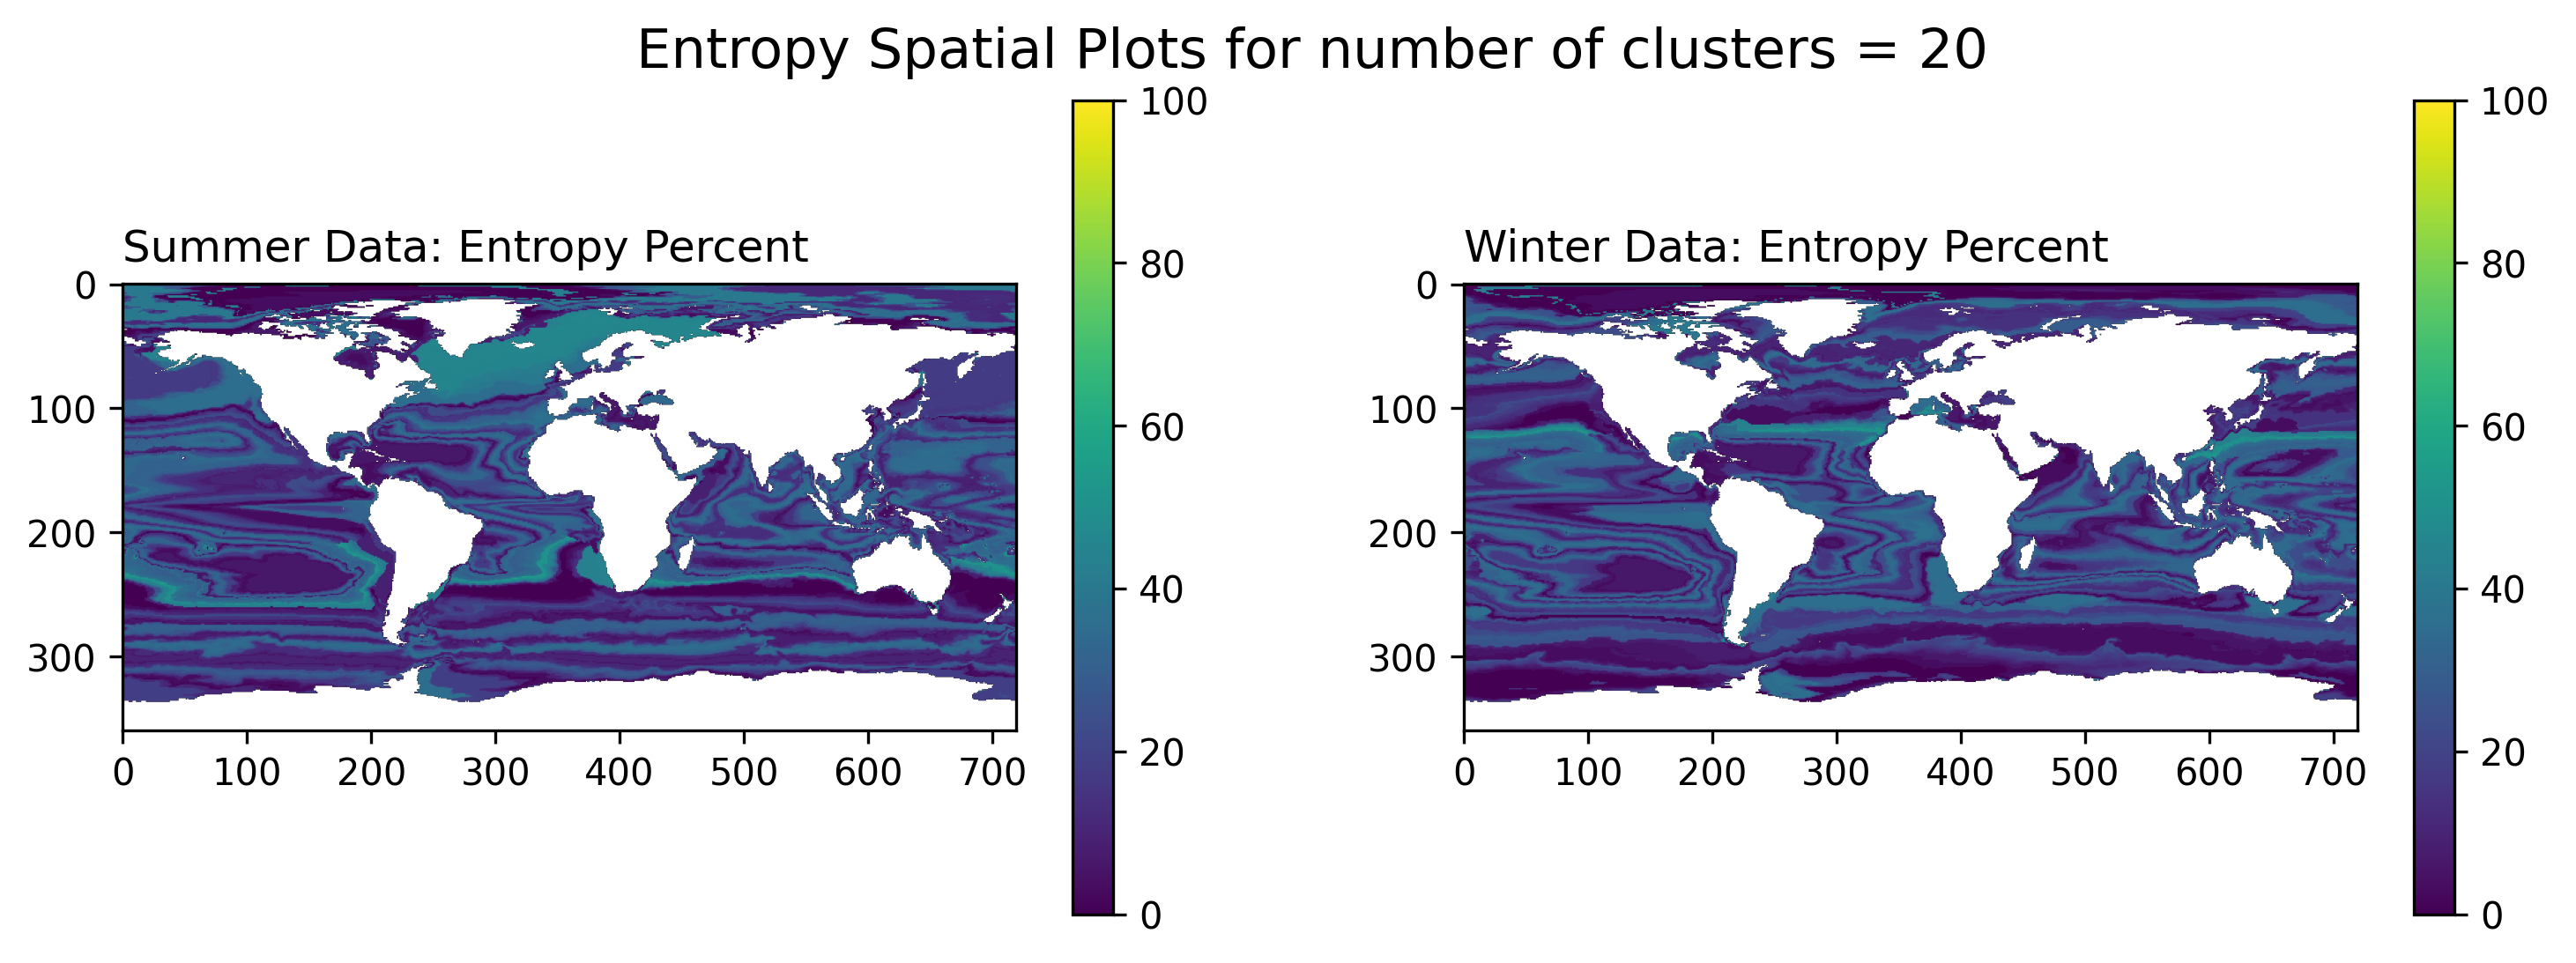

In [104]:
fig = plt.figure(figsize=(12,4),dpi=300)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

"""
Figure 1
"""

ent_1 = ent_data = np.load(entropy_file_path, allow_pickle=True)
ent_data_norm = ent_data / (-np.log2(1/nc)) * 100

ent_array = ent_data_norm
first_half_ent, second_half_ent = split_array_in_half(ent_array)


cls1_ent = cls 
cls_copy_ent = copy.copy(cls1_ent)
cls1_ent[indmiss] = first_half_ent
cls_copy_ent[indmiss] = second_half_ent

mynorm = mcolors.Normalize(vmin=0, vmax=100)
ax1.imshow(np.reshape(cls1_ent,output_data.shape[0:2])[::-1,:], norm=mynorm,cmap='viridis')

"""
Figure 2
"""
ax2.imshow(np.reshape(cls_copy_ent,output_data.shape[0:2])[::-1,:],norm=mynorm, cmap='viridis')
mynorm = mcolors.Normalize(vmin=0, vmax=100)

ax1.set_title('Summer Data: Entropy Percent',loc='left')
ax2.set_title('Winter Data: Entropy Percent',loc='left')
fig.colorbar(ax1.imshow(np.reshape(cls1_ent,output_data.shape[0:2])[::-1,:], cmap='viridis',norm=mynorm), ax = ax1)
fig.colorbar(ax2.imshow(np.reshape(cls_copy_ent,output_data.shape[0:2])[::-1,:], cmap='viridis',norm =mynorm), ax = ax2)
fig.suptitle('Entropy Spatial Plots for number of clusters = '+str(nc),y=0.95,size=15)


## Area Averaged Functional Group Biomass Composition 

<Axes: title={'center': 'Area Averaged Functional Group Biomass Composition for Each Cluster'}, xlabel='Cluster Label', ylabel='Averaged Biomass With Units (mmol C)/(m^3)'>

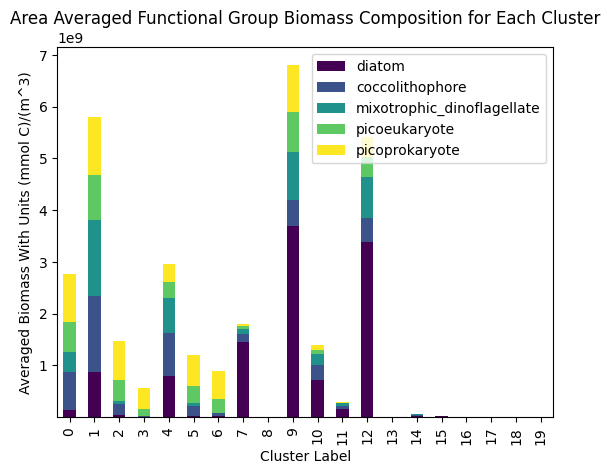

In [105]:
functional_group_df = pd.read_parquet(("functional_group_comp_"+str(nc)+".parquet"))
functional_group_df.set_index("Cluster").plot.bar(
    stacked=True,
    title="Area Averaged Functional Group Biomass Composition for Each Cluster",
    xlabel="Cluster Label",
    ylabel="Averaged Biomass With Units (mmol C)/(m^3)",
    colormap="viridis"
)

# High Complexity: Choose number of clusters (50, 100, 200) 

In [106]:
nc_hc = 100

In [107]:
high_complexity_dir = "/group/maikesgrp/makayla/run_in_separate_nodes/embeddings_folder/spectral/spectral_clustering_codes/_new_attempt/more_parameters/clusters_nclust"+str(nc_hc)+"/01th_ensemble_nclust_"+str(nc_hc)+"_min_dist_0.0_umap_neighbors_500_hclust_neighbors_500.npy" 


In [108]:
# colorbar
num_clusters = nc_hc  
colors_distinct = distinctipy.get_colors(200)
cluster_colors = colors_distinct[:num_clusters]
cmap_distinct = mcolors.ListedColormap(cluster_colors, name='distinctipy_subset')
color_map = {label: mcolors.to_hex(color) for label, color in zip(range(num_clusters), cluster_colors)}
bounds = np.arange(num_clusters + 1)
norm = mcolors.BoundaryNorm(bounds, cmap_distinct.N)

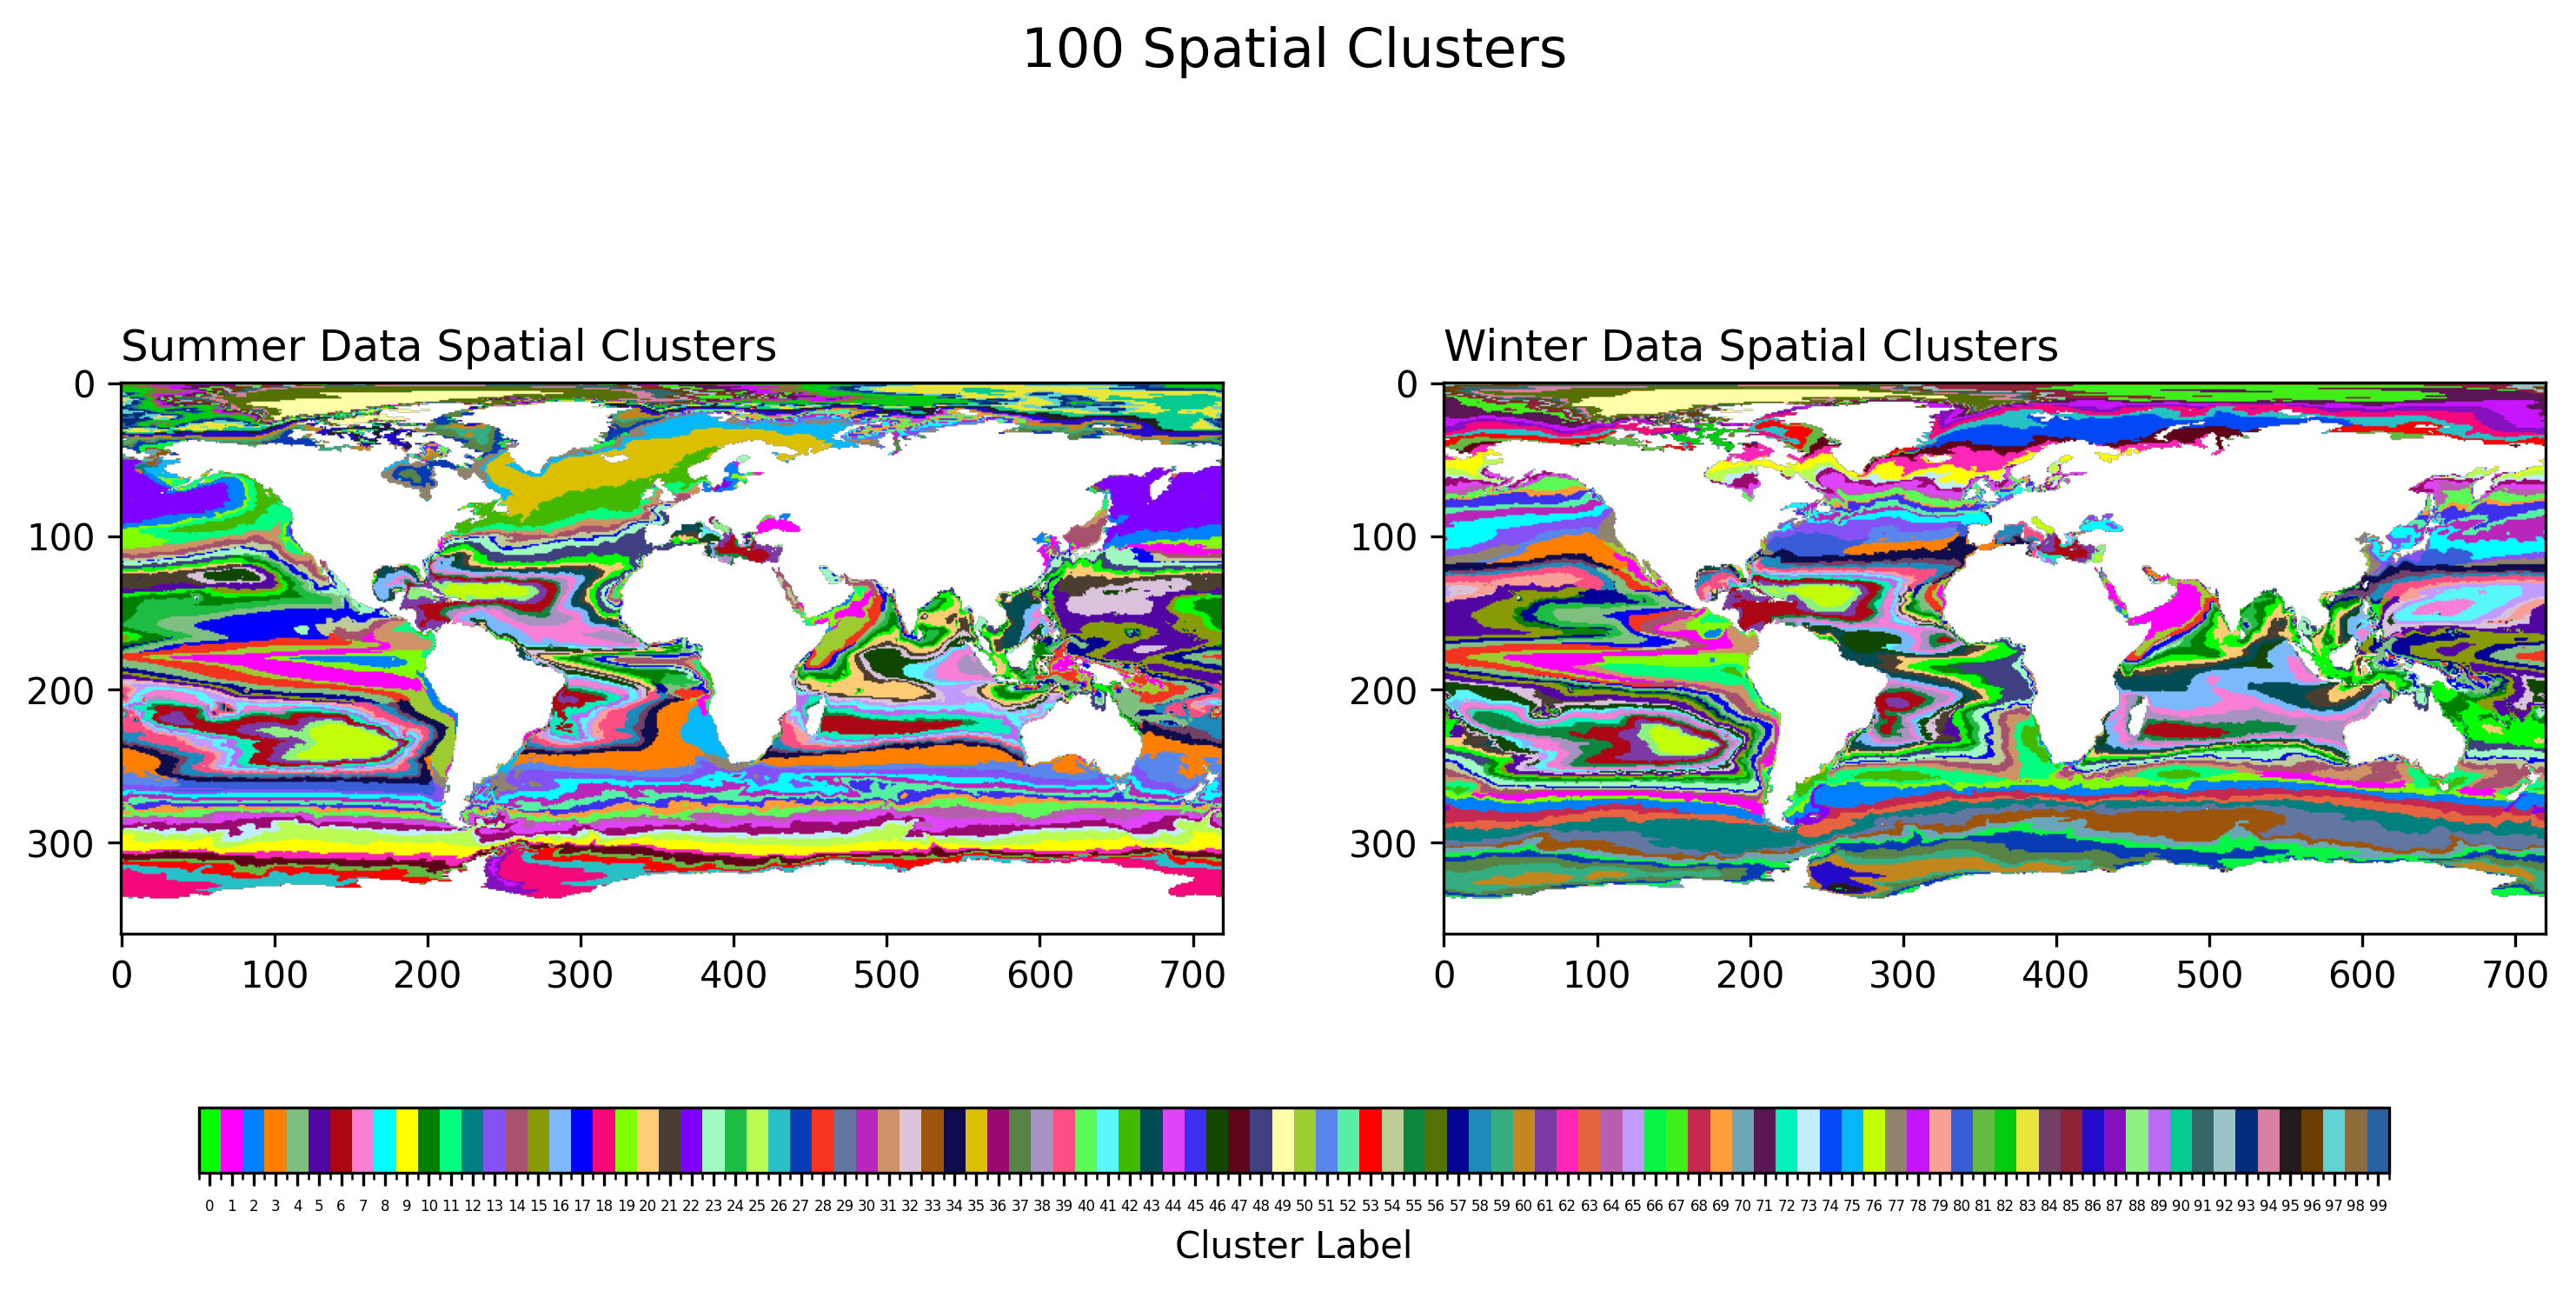

In [109]:

lab_data = np.load(high_complexity_dir, allow_pickle=True)
first_half, second_half = split_array_in_half(lab_data)
cls1 = copy.copy(cls)
cls_copy = copy.copy(cls)
cls1[indmiss] = first_half
cls_copy[indmiss] = second_half


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=300)
im1 = ax1.imshow(np.reshape(cls1, output_data.shape[0:2])[::-1, :],
                 cmap=cmap_distinct, norm=norm)
im2 = ax2.imshow(np.reshape(cls_copy, output_data.shape[0:2])[::-1, :],
                 cmap=cmap_distinct, norm=norm)

ax1.set_title('Summer Data Spatial Clusters', loc='left')
ax2.set_title('Winter Data Spatial Clusters', loc='left')


cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.05])
cb = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap_distinct),
    cax=cbar_ax,
    orientation='horizontal',
    boundaries=bounds,
    ticks=np.arange(num_clusters) + 0.5
)
cb.ax.set_xticklabels([str(i) for i in range(num_clusters)])
cb.ax.tick_params(labelsize=4)
cb.set_label('Cluster Label')

fig.suptitle(f"{num_clusters} Spatial Clusters", y=0.98, size=15)
plt.show()


In [110]:
subsample = 100
emb_data = np.load(embedding_file_path, allow_pickle=True)
lab_data_ss = lab_data[::subsample]
emb_data_scaled = StandardScaler().fit_transform(emb_data)
emb_data_ss = emb_data_scaled[::subsample]

df = pd.DataFrame(emb_data_ss, columns=['x', 'y', 'z'])
df['label'] = pd.Categorical(lab_data_ss, categories=np.arange(num_clusters), ordered=True)

fig3d = px.scatter_3d(
    df, x='x', y='y', z='z',
    color='label',
    title=f"{num_clusters} Clusters: Interactive 3D Scatter Plot",
    color_discrete_map=color_map,
    category_orders={"label": list(range(num_clusters))}
)

fig3d.update_traces(marker=dict(size=1.5))
fig3d.update_layout(width=1000, height=700, 
                    legend=dict(
                        title="Clusters",
                        font=dict(size=14),
                        yanchor="top",
                        y=1,
                        xanchor="left",
                        x=1.02,
                        itemsizing='constant',
                        traceorder="normal")
    ),
fig3d.show()